In [1]:
# Imports das bibliotecas/classes necessarias
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [10]:
# Carregando os dados do dataset CIFAR10
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [11]:
# Numero de classes do modelo
K = len(set(y_train))
print(f'Number of classes {K}')

Number of classes 10


In [12]:
# Layers convolucionais da rede
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
# Layers densas da rede
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu',)(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax',)(x)

model = Model(i, x)

In [13]:
# Compila o modelo com o otimizador adam,
# Função custo sparse categorical crossentropy
# E metrica de precisao
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
)

# Treina o modelo
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.3602 - loss: 1.7456 - val_accuracy: 0.5401 - val_loss: 1.2672
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5350 - loss: 1.2925 - val_accuracy: 0.5939 - val_loss: 1.1598
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5918 - loss: 1.1437 - val_accuracy: 0.6335 - val_loss: 1.0290
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6326 - loss: 1.0375 - val_accuracy: 0.6634 - val_loss: 0.9473
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6570 - loss: 0.9575 - val_accuracy: 0.6836 - val_loss: 0.8988
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6798 - loss: 0.9009 - val_accuracy: 0.6841 - val_loss: 0.8936
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7037 - loss: 0.8379 - val_accuracy: 0.7062 - val_loss: 0.8423
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7173 - loss: 0.7929 

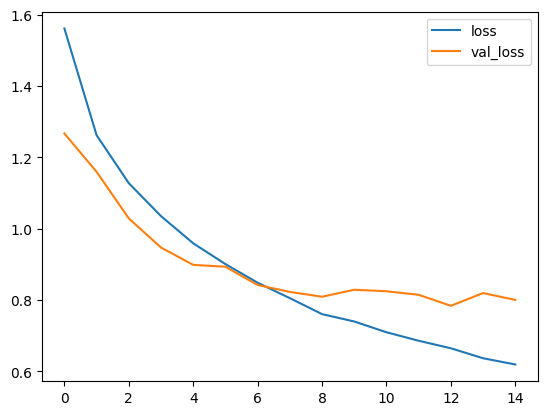

In [14]:
# Plots da função custo por iteração
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

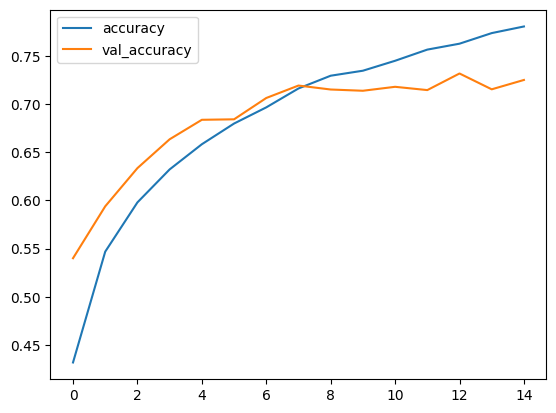

In [15]:
# Plots da precisão por iteração
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Confusion matrix, without normalization
[[769  20  36   8  22   3  14   9  86  33]
 [ 14 853   1   3   6   2   9   1  34  77]
 [ 73   3 560  43 148  56  78  19  13   7]
 [ 27   7  59 427 110 202 103  33  19  13]
 [ 21   5  32  25 795  28  50  30  11   3]
 [ 16   6  34 158  80 611  37  38   8  12]
 [  5   4  15  43  51  27 842   4   9   0]
 [ 23   2  17  27 127  48  10 733   2  11]
 [ 47  32   7  10  10   5   3   2 864  20]
 [ 25  85   6  11  12   6  13  11  36 795]]


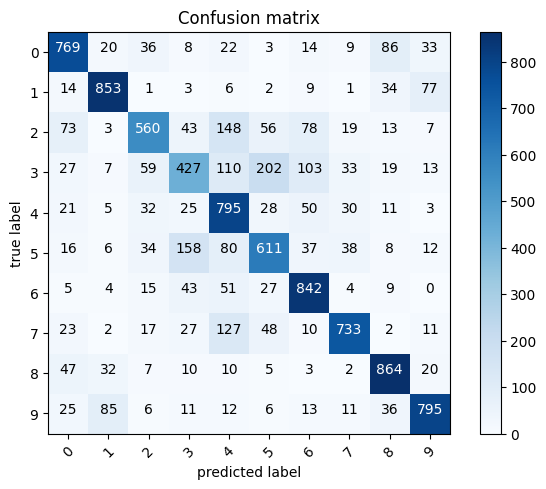

In [16]:
# Plot da matriz de confusão
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  # Verifica se a matriz será nromalizada
  if normalize:
    # Normaliza a matriz (caso necessario)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')



  # Printa a matriz crua
  print(cm)

  # Plot da matriz com matplotlib

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('true label')
  plt.xlabel('predicted label')
  plt.show()


# Gera a matriz com os casos de teste e chama a função
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [17]:
# Mapa de rótulos
labels = ''' airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: cat\n Predicted: frog')

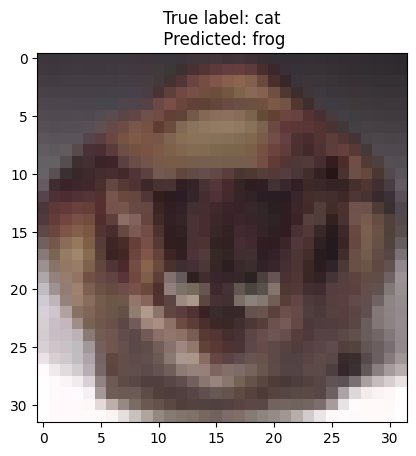

In [21]:
# Separa as predições erradas
missclassified_idx = np.where(p_test != y_test)[0]
# Escolhe uma de forma aleatoria
i = np.random.choice(missclassified_idx)
# Plota mostrando a predição e a classe correta
plt.imshow(X_test[i], cmap='gray')
plt.title(f'True label: {labels[y_test[i]]}\n Predicted: {labels[p_test[i]]}')

# Pratica